In [1]:
# Import all the things we need ---
#   by setting env variables before Keras import you can set up which backend and which GPU it uses
%matplotlib inline
import os,random
import tensorflow
os.environ["KERAS_BACKEND"] = "tensorflow"
#os.environ["KERAS_BACKEND"] = "tensorflow"
os.environ["THEANO_FLAGS"]  = "device=gpu*"
import numpy as np
# import theano as th
#import theano.tensor as T
from keras.utils import np_utils
import keras.models as models
from keras.layers.core import Reshape,Dense,Dropout,Activation,Flatten
from keras.layers.noise import GaussianNoise
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.regularizers import *
from keras.optimizers import adam
import matplotlib.pyplot as plt
import seaborn as sns
import cPickle, random, sys, keras

Using TensorFlow backend.


In [2]:
# Load the dataset ...
#  You will need to seperately download or generate this file
Xd = cPickle.load(open("RML2016.10a_dict.dat",'rb'))


In [3]:
Xd.keys()

[('QPSK', 2),
 ('PAM4', 8),
 ('AM-DSB', -4),
 ('GFSK', 6),
 ('QAM64', 8),
 ('AM-SSB', 12),
 ('PAM4', 18),
 ('QAM64', -6),
 ('QAM16', 2),
 ('QAM16', -20),
 ('8PSK', -18),
 ('PAM4', -6),
 ('WBFM', -18),
 ('BPSK', 8),
 ('CPFSK', 10),
 ('WBFM', 6),
 ('BPSK', 4),
 ('BPSK', -2),
 ('QPSK', -20),
 ('CPFSK', -8),
 ('AM-SSB', 6),
 ('QAM64', -20),
 ('QAM16', 12),
 ('GFSK', -20),
 ('AM-SSB', -12),
 ('CPFSK', 0),
 ('AM-DSB', 6),
 ('BPSK', -16),
 ('QPSK', -6),
 ('8PSK', -12),
 ('CPFSK', -18),
 ('AM-DSB', -18),
 ('QPSK', 8),
 ('PAM4', 14),
 ('WBFM', -8),
 ('AM-DSB', -10),
 ('GFSK', 12),
 ('QAM64', 2),
 ('8PSK', -10),
 ('AM-SSB', -18),
 ('QAM64', -4),
 ('GFSK', -4),
 ('AM-DSB', 8),
 ('PAM4', -16),
 ('QPSK', -16),
 ('BPSK', 16),
 ('WBFM', -14),
 ('CPFSK', 16),
 ('WBFM', 0),
 ('QPSK', 6),
 ('BPSK', 14),
 ('AM-DSB', -8),
 ('GFSK', -10),
 ('CPFSK', -2),
 ('AM-SSB', 8),
 ('QAM16', 8),
 ('QAM16', 6),
 ('QAM16', -16),
 ('QAM64', 18),
 ('AM-SSB', -2),
 ('CPFSK', 6),
 ('BPSK', 0),
 ('BPSK', -6),
 ('8PSK', -14)

In [4]:
print(Xd[('8PSK',8)])

[[[-0.00432657 -0.00566531 -0.0088789  ...  0.00497079  0.00458717
    0.00520201]
  [ 0.00553756  0.00420965  0.00081221 ...  0.0081807   0.00710285
    0.00665953]]

 [[-0.00280642 -0.00346868 -0.00175762 ...  0.01008932  0.01099351
    0.01213254]
  [ 0.00718679  0.00720757  0.00764752 ... -0.00609803 -0.00500112
   -0.0031654 ]]

 [[ 0.00087292  0.00104574  0.00406863 ...  0.0015027   0.00037212
   -0.00144465]
  [-0.01111491 -0.01055908 -0.01004331 ...  0.0047081   0.00852662
    0.01043768]]

 ...

 [[ 0.00596765  0.00711255  0.00832858 ... -0.00893829 -0.01038883
   -0.0111594 ]
  [-0.00168903  0.00038979  0.00254616 ... -0.00020535 -0.00093815
   -0.00259126]]

 [[ 0.00604668  0.00559545  0.00366478 ...  0.00106483  0.00252693
    0.00272516]
  [-0.00780314 -0.00372012  0.00034891 ...  0.00633282  0.0078829
    0.00767618]]

 [[-0.00639907 -0.00898035 -0.01024199 ...  0.00838114  0.00857901
    0.00751779]
  [ 0.00142663  0.00125648  0.00210671 ... -0.00482053 -0.00631772
   -0

In [5]:
#WB-FM, AM-SSB, and AM-DSB 是模拟调制，将其去除
for i in range(-20,20,2):
    del Xd['AM-SSB', i]
    del Xd['WBFM', i]
    del Xd['AM-DSB', i]

In [6]:
snrs,mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1,0])
X = []  
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod,snr)])
        for i in range(Xd[(mod,snr)].shape[0]):  lbl.append((mod,snr))
X = np.vstack(X)

In [7]:
print(X.shape)
print(type(lbl))
print(type(X))
print(type(Xd))
print(type(snrs))

(160000, 2, 128)
<type 'list'>
<type 'numpy.ndarray'>
<type 'dict'>
<type 'list'>


In [8]:
Xd.keys()#print(X[0])

[('QPSK', 2),
 ('PAM4', 8),
 ('GFSK', 6),
 ('QAM64', 8),
 ('PAM4', 18),
 ('QAM64', -6),
 ('QAM16', 2),
 ('QAM16', -20),
 ('8PSK', -18),
 ('PAM4', -6),
 ('BPSK', 8),
 ('CPFSK', 10),
 ('BPSK', 4),
 ('BPSK', -2),
 ('QPSK', -20),
 ('CPFSK', -8),
 ('QAM64', -20),
 ('QAM16', 12),
 ('GFSK', -20),
 ('CPFSK', 0),
 ('BPSK', -16),
 ('QPSK', -6),
 ('8PSK', -12),
 ('CPFSK', -18),
 ('QPSK', 8),
 ('PAM4', 14),
 ('GFSK', 12),
 ('QAM64', 2),
 ('8PSK', -10),
 ('QAM64', -4),
 ('GFSK', -4),
 ('PAM4', -16),
 ('QPSK', -16),
 ('BPSK', 16),
 ('CPFSK', 16),
 ('QPSK', 6),
 ('BPSK', 14),
 ('GFSK', -10),
 ('CPFSK', -2),
 ('QAM16', 8),
 ('QAM16', 6),
 ('QAM16', -16),
 ('QAM64', 18),
 ('CPFSK', 6),
 ('BPSK', 0),
 ('BPSK', -6),
 ('8PSK', -14),
 ('CPFSK', -12),
 ('BPSK', -20),
 ('PAM4', 4),
 ('GFSK', 10),
 ('QAM16', -6),
 ('QAM64', 4),
 ('PAM4', -20),
 ('8PSK', 10),
 ('QAM64', -10),
 ('GFSK', -6),
 ('PAM4', -10),
 ('QPSK', -2),
 ('8PSK', -8),
 ('8PSK', 0),
 ('QPSK', 12),
 ('8PSK', 12),
 ('GFSK', 0),
 ('QAM64', 14),
 

In [9]:
# Partition the data
#  into training and test sets of the form we can train/test on 
#  while keeping SNR and Mod labels handy for each
n_examples =X.shape[0]
n_train =int(n_examples * 0.5) 
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)
test_idx = list(set(range(0,n_examples))-set(train_idx))
X_train = X[train_idx]
X_test =  X[test_idx]
def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy)+1])
    yy1[np.arange(len(yy)),yy] = 1
    return yy1

Y_train = to_onehot(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_test = to_onehot(map(lambda x: mods.index(lbl[x][0]), test_idx))

In [10]:
in_shp = list(X_train.shape[1:])
print X_train.shape, in_shp
classes = mods

(80000, 2, 128) [2, 128]


In [11]:
print(mods)


['8PSK', 'BPSK', 'CPFSK', 'GFSK', 'PAM4', 'QAM16', 'QAM64', 'QPSK']


In [12]:
dr = 0.5  # dropout rate (%) 卷积层部分  https://keras-cn.readthedocs.io/en/latest/layers/convolutional_layer/#conv2d
model = models.Sequential()  # 这里使用keras的序贯模型  https://keras-cn.readthedocs.io/en/latest/models/sequential/
# Reshape [N,2,128] to [N,1,2,128] on input
model.add(Reshape(([1] + in_shp), input_shape=in_shp))
model.add(ZeroPadding2D((0, 2), data_format="channels_first"))
# 卷积核维度(输出尺度),卷积核的宽度和长度,“valid”代表只进行有效的卷积，即对边界数据不处理,
# 层权重weights的初始化函数
# channels_first corresponds to inputs with shape (batch, channels, height, width).
model.add(Convolution2D(256, (1, 3), padding='valid', activation="relu", name="conv1", init='glorot_uniform',
                 data_format="channels_first"))
model.add(Dropout(dr))
model.add(ZeroPadding2D((0, 2), data_format="channels_first"))
model.add(Convolution2D(80, (2, 3), padding="valid", activation="relu", name="conv2", init='glorot_uniform',
                 data_format="channels_first"))
model.add(Dropout(dr))
# 多维的输入一维化，常用在从卷积层到全连接层的过渡
model.add(Flatten())
model.add(Dense(256, activation='relu', init='he_normal', name="dense1"))
model.add(Dropout(dr))
model.add(Dense(len(classes), init='he_normal', name="dense2"))
model.add(Activation('softmax'))
model.add(Reshape([len(classes)]))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

/home/mao/anaconda3/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (1, 3), kernel_initializer="glorot_uniform", name="conv1", activation="relu", data_format="channels_first", padding="valid")`
  # Remove the CWD from sys.path while we load stuff.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1, 2, 128)         0         
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 1, 2, 132)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 256, 2, 130)       1024      
_________________________________________________________________
dropout_1 (Dropout)          (None, 256, 2, 130)       0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 256, 2, 134)       0         
_________________________________________________________________
conv2 (Conv2D)               (None, 80, 1, 132)        122960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 80, 1, 132)        0         
__________

/home/mao/anaconda3/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(80, (2, 3), kernel_initializer="glorot_uniform", name="conv2", activation="relu", data_format="channels_first", padding="valid")`
  
/home/mao/anaconda3/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, kernel_initializer="he_normal", activation="relu", name="dense1")`
/home/mao/anaconda3/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:20: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, kernel_initializer="he_normal", name="dense2")`


In [13]:
# Set up some params 
epochs = 100     # number of epochs to train on
batch_size = 1024 # training batch size

In [14]:
filepath = "convmodrecnets_%s_0.5.wts.h5" # (name)  # 所要保存的文件名字，h5格式，不用写路径，默认在程序执行的文件夹内
history = model.fit(X_train,
                    Y_train,
                    batch_size=batch_size,
                    nb_epoch=epochs,
                    verbose=2,
                    validation_data=(X_test, Y_test),
                    callbacks=[  # 回调函数，https://keras-cn.readthedocs.io/en/latest/other/callbacks/
                        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True,
                                                        mode='auto'),
                        keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
                    ])  # EarlyStopping 当监测值不再改善时，该回调函数将中止训练，如去除本行将执行所有epoch

/home/mao/anaconda3/envs/tensorflow/lib/python2.7/site-packages/ipykernel_launcher.py:11: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # This is added back by InteractiveShellApp.init_path()


Train on 80000 samples, validate on 80000 samples
Epoch 1/100
 - 7s - loss: 2.0796 - val_loss: 2.0795
Epoch 2/100
 - 6s - loss: 2.0795 - val_loss: 2.0795
Epoch 3/100
 - 6s - loss: 2.0791 - val_loss: 2.0747
Epoch 4/100
 - 6s - loss: 1.9945 - val_loss: 1.9120
Epoch 5/100
 - 6s - loss: 1.8359 - val_loss: 1.7289
Epoch 6/100
 - 6s - loss: 1.6562 - val_loss: 1.5203
Epoch 7/100
 - 6s - loss: 1.5170 - val_loss: 1.4147
Epoch 8/100
 - 6s - loss: 1.4375 - val_loss: 1.3593
Epoch 9/100
 - 6s - loss: 1.3928 - val_loss: 1.2751
Epoch 10/100
 - 6s - loss: 1.3501 - val_loss: 1.3043
Epoch 11/100
 - 6s - loss: 1.3132 - val_loss: 1.2072
Epoch 12/100
 - 6s - loss: 1.2885 - val_loss: 1.2679
Epoch 13/100
 - 6s - loss: 1.2712 - val_loss: 1.2565
Epoch 14/100
 - 6s - loss: 1.2493 - val_loss: 1.1552
Epoch 15/100
 - 6s - loss: 1.2424 - val_loss: 1.1436
Epoch 16/100
 - 6s - loss: 1.2288 - val_loss: 1.1521
Epoch 17/100
 - 6s - loss: 1.2204 - val_loss: 1.1371
Epoch 18/100
 - 6s - loss: 1.2041 - val_loss: 1.1679
Epoch

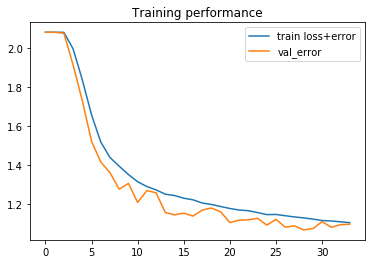

In [15]:
plt.figure()
plt.title('Training performance')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.plot(history.epoch, history.history['val_loss'], label='val_error')
plt.legend()
plt.savefig('%s Training performance' )

In [16]:
model.load_weights(filepath)
score = model.evaluate(X_test, Y_test, verbose=0, batch_size=batch_size)
print('evaluate_score:', score)

('evaluate_score:', 1.0661605325698853)


In [17]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(title)
    plt.show()

In [18]:
test_Y_hat = model.predict(X_test, batch_size=batch_size)

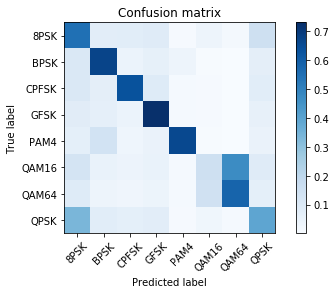

In [19]:
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(Y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)

<Figure size 432x288 with 0 Axes>

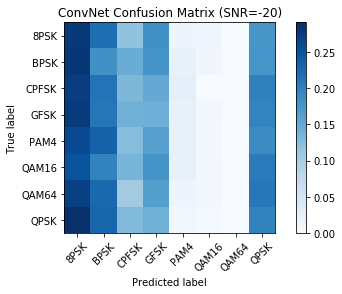

Overall Accuracy:  0.12152777777777778


<Figure size 432x288 with 0 Axes>

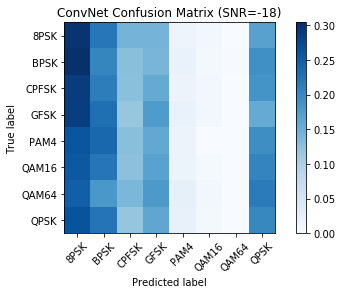

Overall Accuracy:  0.12882489071740807


<Figure size 432x288 with 0 Axes>

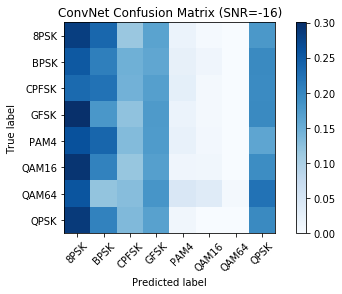

Overall Accuracy:  0.1296844181459566


<Figure size 432x288 with 0 Axes>

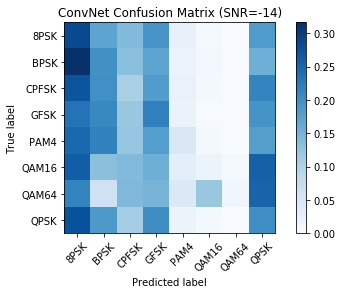

Overall Accuracy:  0.13404892661008488


<Figure size 432x288 with 0 Axes>

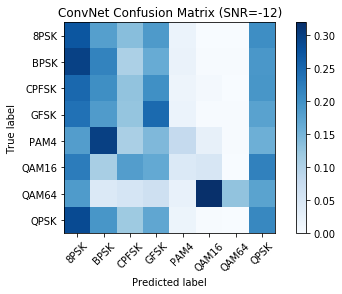

Overall Accuracy:  0.1681503461918892


<Figure size 432x288 with 0 Axes>

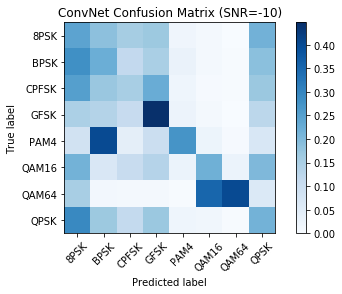

Overall Accuracy:  0.27084889220811553


<Figure size 432x288 with 0 Axes>

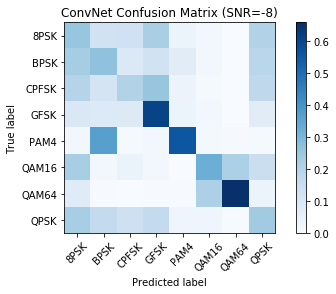

Overall Accuracy:  0.38990360223236936


<Figure size 432x288 with 0 Axes>

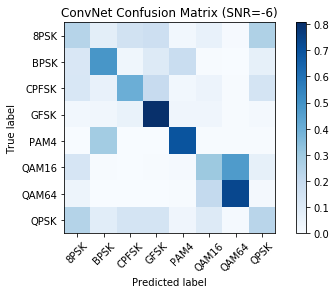

Overall Accuracy:  0.4878293601003764


<Figure size 432x288 with 0 Axes>

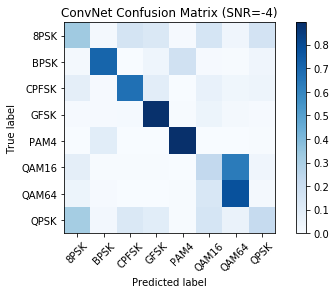

Overall Accuracy:  0.5884988797610157


<Figure size 432x288 with 0 Axes>

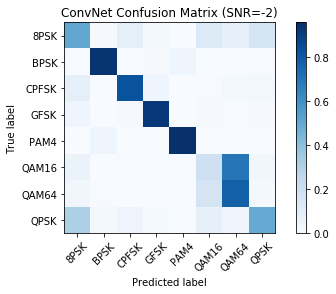

Overall Accuracy:  0.6998990408884401


<Figure size 432x288 with 0 Axes>

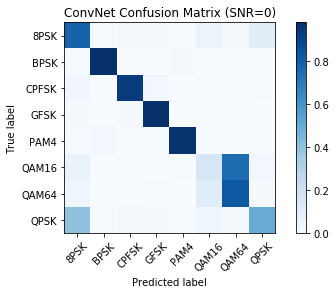

Overall Accuracy:  0.7661816357250376


<Figure size 432x288 with 0 Axes>

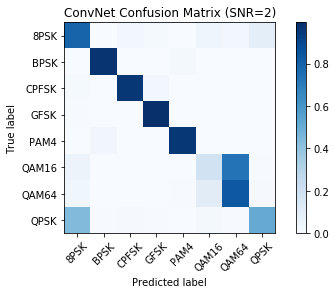

Overall Accuracy:  0.7748983739837398


<Figure size 432x288 with 0 Axes>

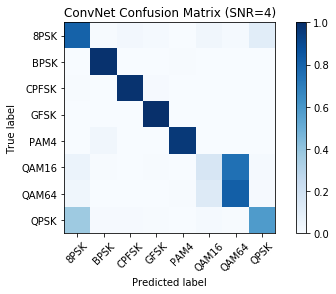

Overall Accuracy:  0.7911344853493614


<Figure size 432x288 with 0 Axes>

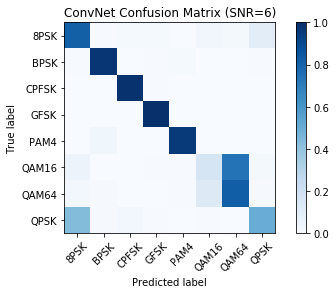

Overall Accuracy:  0.7848320158102767


<Figure size 432x288 with 0 Axes>

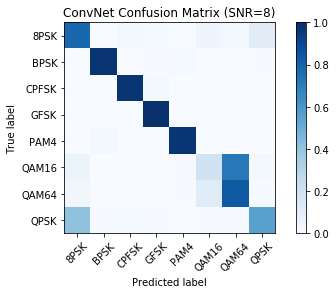

Overall Accuracy:  0.7849355797819624


<Figure size 432x288 with 0 Axes>

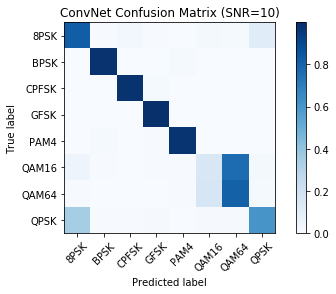

Overall Accuracy:  0.7918731417244796


<Figure size 432x288 with 0 Axes>

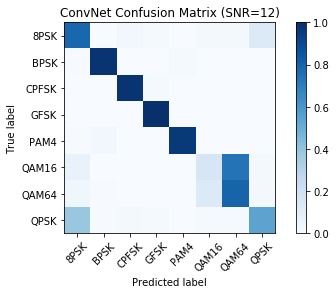

Overall Accuracy:  0.7747294236093633


<Figure size 432x288 with 0 Axes>

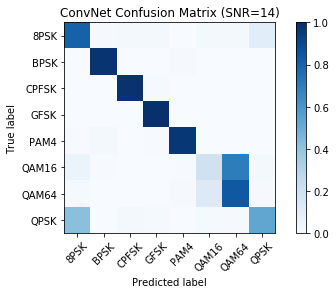

Overall Accuracy:  0.7861527129879695


<Figure size 432x288 with 0 Axes>

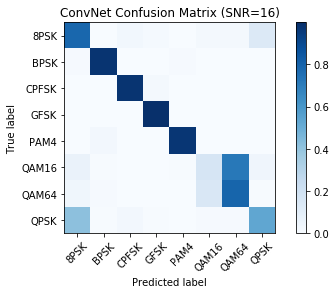

Overall Accuracy:  0.7755359394703657


<Figure size 432x288 with 0 Axes>

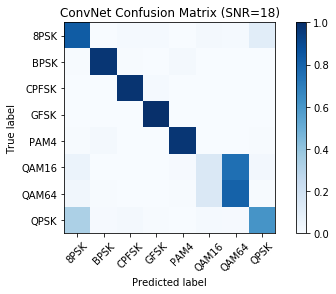

Overall Accuracy:  0.7899600399600399


In [20]:
# Plot confusion matrix
acc = {}
for snr in snrs:

    # extract classes @ SNR
    test_SNRs = map(lambda x: lbl[x][1], test_idx)
    test_X_i = X_test[np.where(np.array(test_SNRs)==snr)]
    test_Y_i = Y_test[np.where(np.array(test_SNRs)==snr)]    

    # estimate classes
    test_Y_i_hat = model.predict(test_X_i)
    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,test_X_i.shape[0]):
        j = list(test_Y_i[i,:]).index(1)
        k = int(np.argmax(test_Y_i_hat[i,:]))
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
    plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="ConvNet Confusion Matrix (SNR=%d)"%(snr))
    
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print "Overall Accuracy: ", cor / (cor+ncor)
    acc[snr] = 1.0*cor/(cor+ncor)

In [21]:
# Save results to a pickle file for plotting later
print acc
fd = open('results_cnn2_d0.5.dat','wb')
cPickle.dump( ("CNN2", 0.5, acc) , fd )

{0: 0.7661816357250376, 16: 0.7755359394703657, 2: 0.7748983739837398, 4: 0.7911344853493614, 6: 0.7848320158102767, 8: 0.7849355797819624, 12: 0.7747294236093633, 10: 0.7918731417244796, -20: 0.12152777777777778, 18: 0.7899600399600399, -18: 0.12882489071740807, -16: 0.1296844181459566, -14: 0.13404892661008488, -12: 0.1681503461918892, 14: 0.7861527129879695, -10: 0.27084889220811553, -8: 0.38990360223236936, -6: 0.4878293601003764, -4: 0.5884988797610157, -2: 0.6998990408884401}


Text(0.5,1,'CNN2 Classification Accuracy')

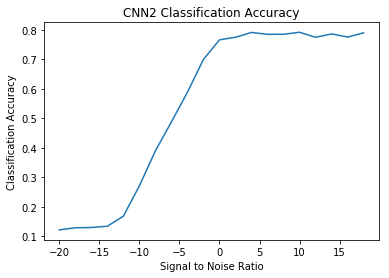

In [22]:
# Plot accuracy curve
plt.plot(snrs, map(lambda x: acc[x], snrs))
plt.xlabel("Signal to Noise Ratio")
plt.ylabel("Classification Accuracy")
plt.title("CNN2 Classification Accuracy")